# PDP and ICE Plots


<b>Dataset</b>: https://www.kaggle.com/datasets/conorsully1/pdp-and-ice-plots/settings

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

from sklearn.metrics import accuracy_score,confusion_matrix

import sys
sys.path.append('../')
import utils

## Dataset

In [2]:
# Load dataset
data = pd.read_csv("../../data/PDP_ICE.csv",sep='\t')

# Get features
y = data['price']
X = data.drop('price', axis=1)

print(len(data))
data.head()

1000


,owner_age,car_age,km_driven,repairs,car_type,price
0,23,2.17,25142.768002,24,0,4077
1,26,18.92,120164.547502,17,0,2804
2,35,24.90,90244.499657,13,0,4432
3,34,1.93,15384.326615,18,0,5340
4,67,6.88,32319.146178,19,0,4053


# Sklearn

In [4]:
# Model
rf = RandomForestRegressor(max_depth=4, n_estimators=100,random_state=0)
rf.fit(X, y)

# Get predictions
y_pred = rf.predict(X)

print(y_pred[0])

3524.8992796319403


Text(0.5, 0, 'Actual')

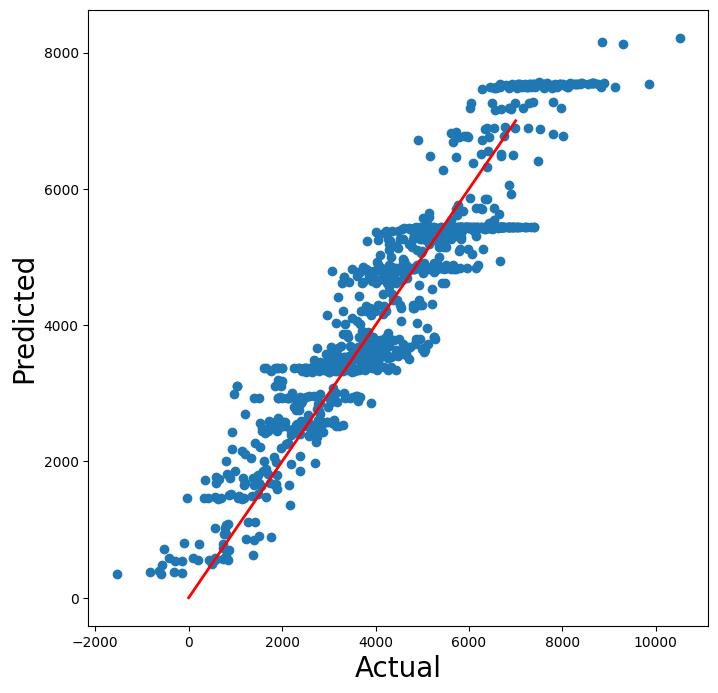

In [4]:
# Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 7000], [0, 7000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

# Explaining PDPs

In [5]:
# Get 1000 individual prediction lines
pdp_lines = partial_dependence(rf, 
                               X,["car_age"], 
                               percentiles=(0,1), 
                               grid_resolution=100,
                               kind='individual')


len(pdp_lines['individual'][0])

1000

In [9]:
print(np.shape(pdp_lines['values']))
print(np.shape(pdp_lines['individual']))

(1, 100)
(1, 1000, 100)


In [9]:
# First car in dataset
car_0 = data.iloc[0]
car_0

owner_age       23.000000
car_age          2.170000
km_driven    25142.768002
repairs         24.000000
car_type         0.000000
price         4077.000000
Name: 0, dtype: float64

/Users/conorosullivan/Documents/git/XAI-tutorial/XAI3.11/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


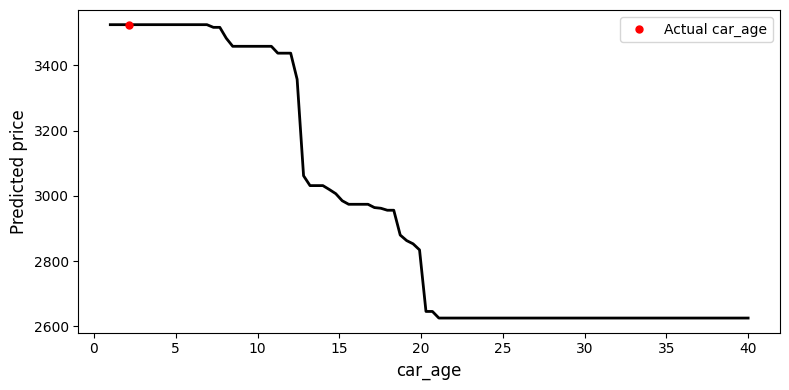

In [11]:
# Plot the first prediction line
plt.figure(figsize=(8,4))

plt.plot(pdp_lines['values'][0], pdp_lines['individual'][0][0], linewidth=2,color='black')

# add red dot for actual car_age
plt.plot(car_0['car_age'],y_pred[0],'ro',markersize=5,label='Actual car_age')

plt.ylabel('Predicted price',size=12)
plt.xlabel('car_age',size=12)
plt.legend(loc='upper right')

# Save figure
utils.save_fig("MA1_line_1")

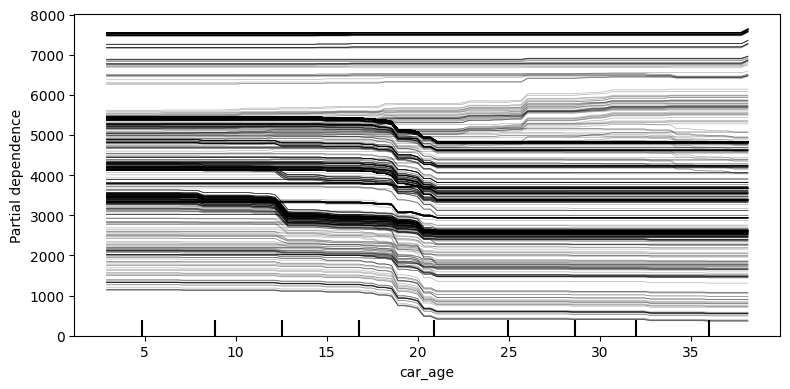

In [7]:
# ICE Plot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['car_age'], 
                                        kind='individual',
                                        ice_lines_kw={"color": "black"},
                                        ax=ax)

# Save figure
utils.save_fig("MA1_ice_plot")

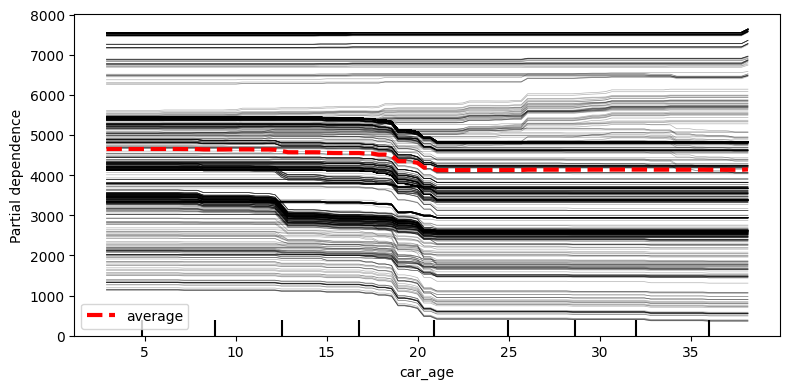

In [13]:
# ICE Plot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['car_age'], 
                                        kind='both',
                                        ice_lines_kw={"color": "black"},
                                        ax=ax,
                                        pd_line_kw={"color": "red","lw":3,'linestyle':'--'})

# Save figure
utils.save_fig("MA1_pdp_uncentered")

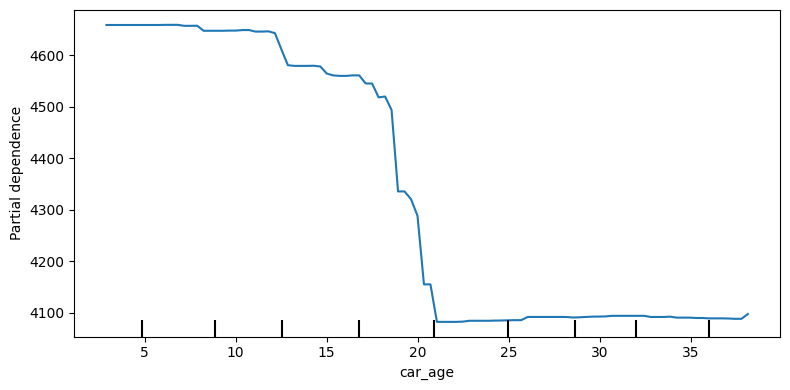

In [37]:
# PDP for owner_age
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['car_age'], 
                                        kind='average',
                                        ax=ax)

# Save figure
utils.save_fig("MA1_pdp_car_age")

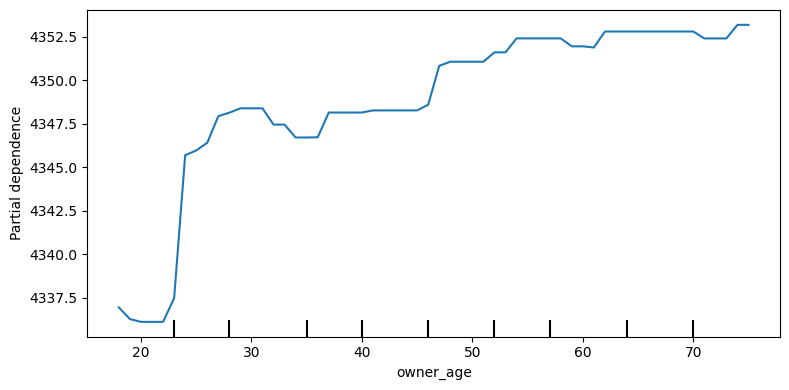

In [35]:
# PDP for owner_age
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['owner_age'], 
                                        kind='average',
                                        ax=ax)

# Save figure
utils.save_fig("MA1_pdp_owner_age")

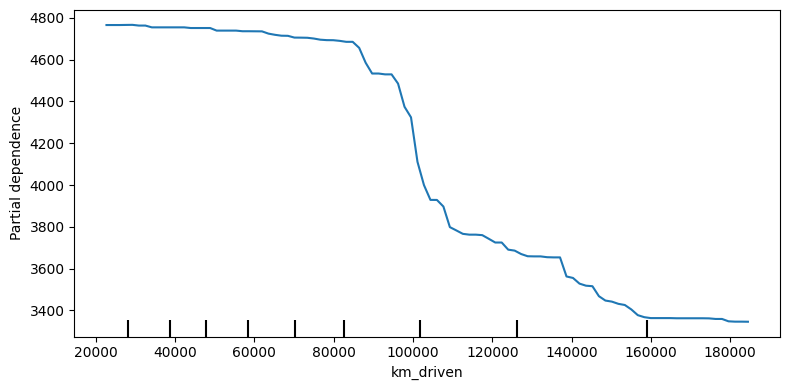

In [31]:
# PDP for km_driven
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['km_driven'], 
                                        kind='average',
                                        ax=ax)

# Save figure
utils.save_fig("MA1_pdp_km_driven")

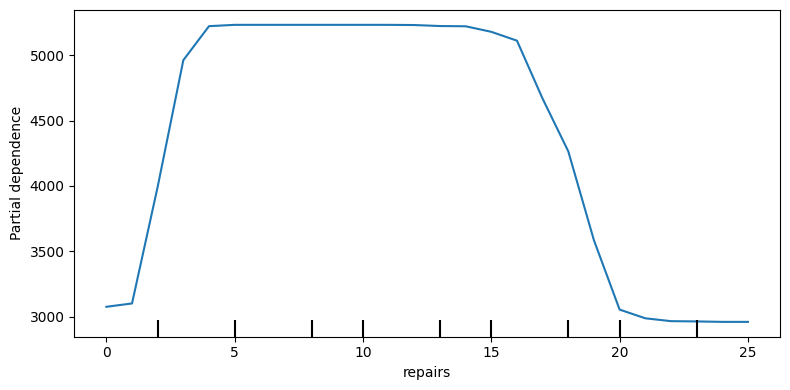

In [32]:
# PDP for repairs
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['repairs'], 
                                        kind='average',
                                        ax=ax)

# Save figure
utils.save_fig("MA1_pdp_repairs")

# Ice Plot

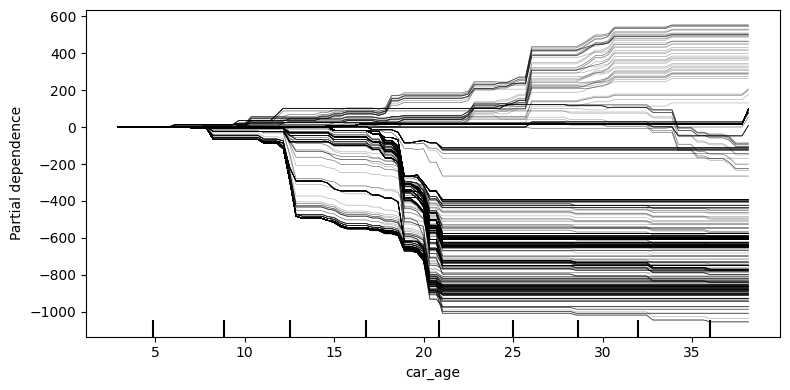

In [14]:
# Centered ICE Plot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['car_age'], 
                                        kind='individual',
                                        centered= True,
                                        ice_lines_kw={"color": "black"},
                                        ax=ax)

# Save figure
utils.save_fig("MA1_centered_ice_plot")

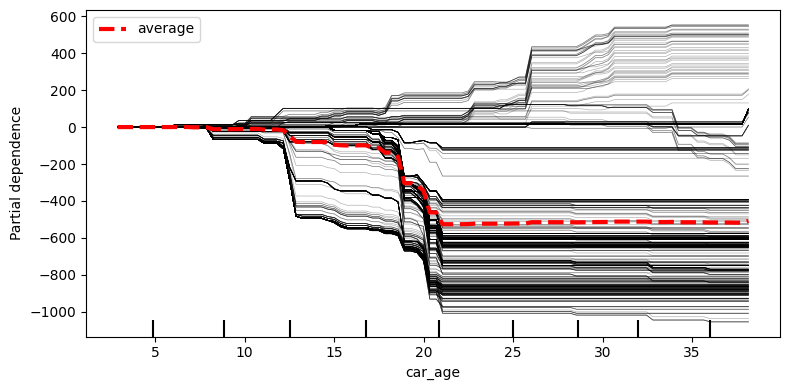

In [36]:
# PDP and ICE Plot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, ['car_age'], 
                                        kind='both',
                                        centered= True,
                                        ice_lines_kw={"color": "black"},
                                        pd_line_kw={"color": "red","lw":3,'linestyle':'--'},
                                        ax=ax)

# Save figure
utils.save_fig("MA1_centered_pdp")

In [15]:
# Get 1000 individual prediction lines
pdp_lines = partial_dependence(rf, 
                               X,["car_age"], 
                               percentiles=(0,1), 
                               grid_resolution=100,
                               kind='both')

# Center the lines
for i in range(0,1000):
    pdp_start = pdp_lines['individual'][0][i][0]
    pdp_lines['individual'][0][i] = pdp_lines['individual'][0][i] - pdp_start

/Users/conorosullivan/Documents/git/XAI-tutorial/XAI3.11/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


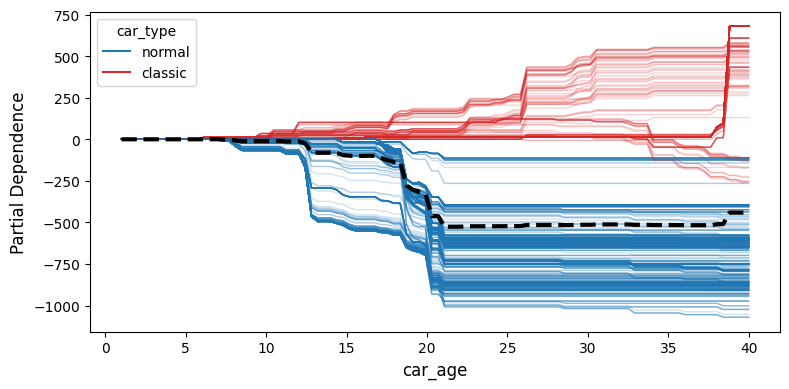

In [16]:
# Plot an ice plot colored by car type
color_feature = 'car_type'
colors = ['tab:blue','tab:red']
plt.figure(figsize=(8,4))

# ICE plot
for i in range(0,1000):
    color = colors[X[color_feature].values[i]]
    plt.plot(pdp_lines['values'][0],
             pdp_lines['individual'][0][i],
             linewidth=1,
             color=color,
             alpha=0.2)

# PDP line
pdp = pdp_lines['average'][0]-pdp_lines['average'][0][0]
plt.plot(pdp_lines['values'][0], pdp, linewidth=3,color='black',linestyle='--')

plt.ylabel('Partial Dependence',size=12)
plt.xlabel('car_age',size=12)

# Add custom legend with color for each car type
plt.legend(handles=[plt.Line2D([0], [0], color=colors[0], label='normal'),
                    plt.Line2D([0], [0], color=colors[1], label='classic')],
                    title="car_type")

# Save figure
utils.save_fig("MA1_custom_ice_plot")

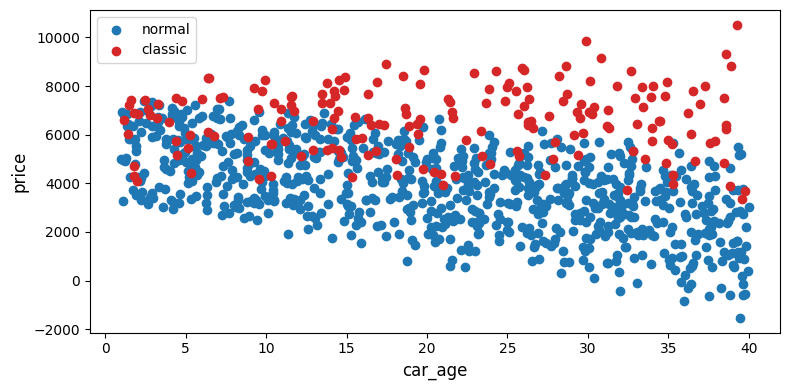

In [7]:
colors = ['tab:blue','tab:red']

# Interaction between car_age and car_type
plt.figure(figsize=(8,4))

data_normal = data[data['car_type']==0]
data_classic = data[data['car_type']==1]

plt.scatter(data_normal['car_age'],data_normal['price'],color=colors[0],label='normal')
plt.scatter(data_classic['car_age'],data_classic['price'],color=colors[1],label='classic')

plt.ylabel('price',size=12)
plt.xlabel('car_age',size=12)
plt.legend(loc='upper left')

# Save figure
utils.save_fig("IN1_scatterplot")

# 2D PDP

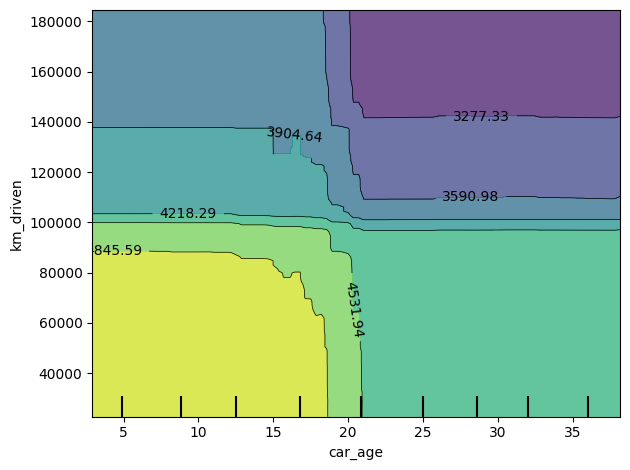

In [12]:
# 2D PDP
features = [("car_age","km_driven")]
PartialDependenceDisplay.from_estimator(rf, X, features)

# Save figure
utils.save_fig("MA1_2d_pdp")

## PDP for categorical features

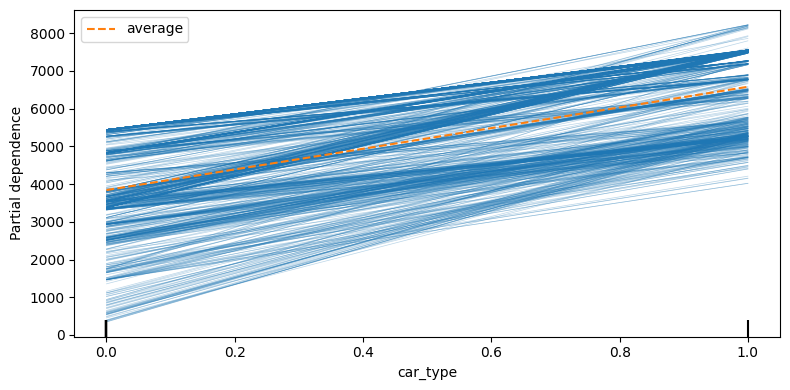

In [13]:
features = ["car_type"]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rf, X, features, kind='both',ax=ax)

# Save figure
utils.save_fig("MA1_pdp_car_type")

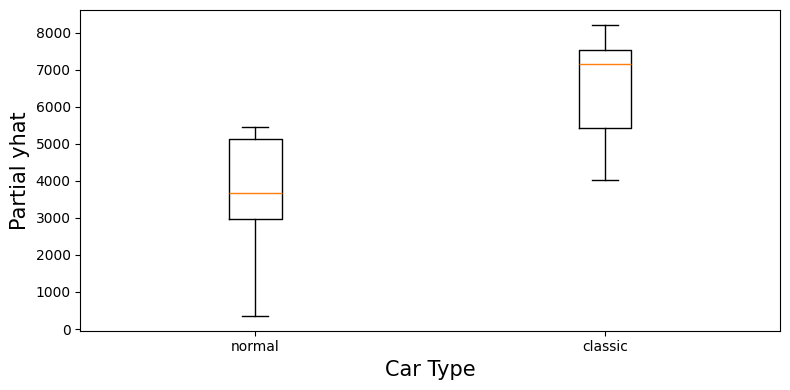

In [14]:
# PDP boxplot for car type
features = ["car_type"]
pdp_lines = partial_dependence(rf, X, features, kind='both') 

# Get ice values
ice = pdp_lines['individual'][0]
normal_ice = [i[0] for i in ice]
classic_ice = [i[1] for i in ice]
data = [normal_ice, classic_ice]

# Plot ice values
plt.figure(figsize=(8, 4))

labels = ['normal','classic']
plt.boxplot(data,labels=labels)

plt.ylabel('Partial yhat',size=15)
plt.xlabel('Car Type',size=15)

# Save figure
utils.save_fig("MA1_pdp_boxplot")

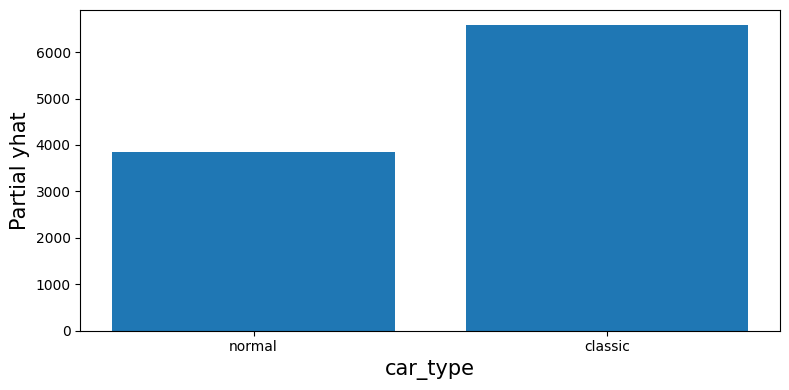

In [12]:
# PDP barchart for car type
features = ["car_type"]
pdp_lines = partial_dependence(rf, X, features, kind='both') 

# Get ice values
ice = pdp_lines['individual'][0]
normal_ice = [i[0] for i in ice]
classic_ice = [i[1] for i in ice]
data = [normal_ice, classic_ice]
avg_data = [np.mean(normal_ice),np.mean(classic_ice)]

# Plot ice values
plt.figure(figsize=(8, 4))

labels = ['normal','classic']
plt.bar(labels,avg_data)

plt.ylabel('Partial yhat',size=15)
plt.xlabel('car_type',size=15)

# Save figure
utils.save_fig("MA3_pdp_barchart")

# Binary target variable  

In [15]:
# Binary target variable
avg_y = np.mean(y)
y_binary = [1 if y_>avg_y else 0 for y_ in y]

# Train model 
rfc = RandomForestClassifier(max_depth=4, n_estimators=100,random_state=0)
rfc.fit(X, y_binary)

# Get predictions
y_pred = rfc.predict(X)

print(confusion_matrix(y_binary, y_pred))
accuracy_score(y_binary, y_pred)

[[462  49]
 [ 27 462]]


0.924

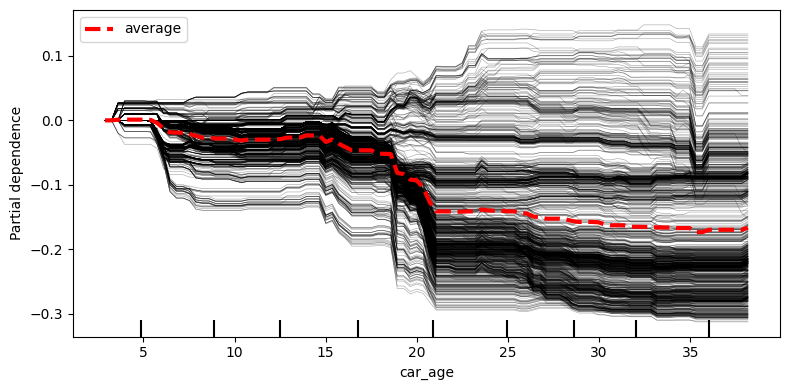

In [16]:
# PDP for binary target variable
features = ["car_age"]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
PartialDependenceDisplay.from_estimator(rfc, X, features, 
                                        kind='both',
                                        centered=True,
                                        ice_lines_kw={"color": "black"},
                                        pd_line_kw={"color": "red","lw":3,'linestyle':'--'},
                                        ax=ax)

# Save figure
utils.save_fig("MA1_pdp_binary")

# GIF for video

/Users/conorosullivan/Documents/git/XAI-tutorial/XAI/lib/python3.9/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
MovieWriter Pillow unavailable; using Pillow instead.


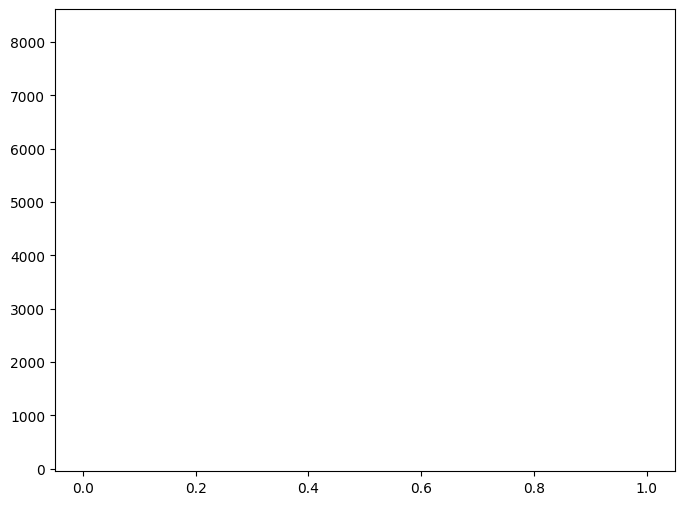

In [97]:
# create a gif of the 1000 lines
from celluloid import Camera
from IPython.display import HTML

fig = plt.figure(figsize=(8,6))
camera = Camera(fig)
for i in range(0,10):
    for j in range(0,i):
        plt.plot(pdp_lines['values'][0], pdp_lines['individual'][0][j], linewidth=1,color='black',alpha=0.2)
    camera.snap()

for i in range(10,100,10):
    for j in range(0,i):
        plt.plot(pdp_lines['values'][0], pdp_lines['individual'][0][j], linewidth=1,color='black',alpha=0.2)
    camera.snap()

for i in range(100,1000,50):
    for j in range(0,i):
        plt.plot(pdp_lines['values'][0], pdp_lines['individual'][0][j], linewidth=1,color='black',alpha=0.2)
    camera.snap()

animation = camera.animate()
animation.save('pdp.gif', writer = 'Pillow')